# plot

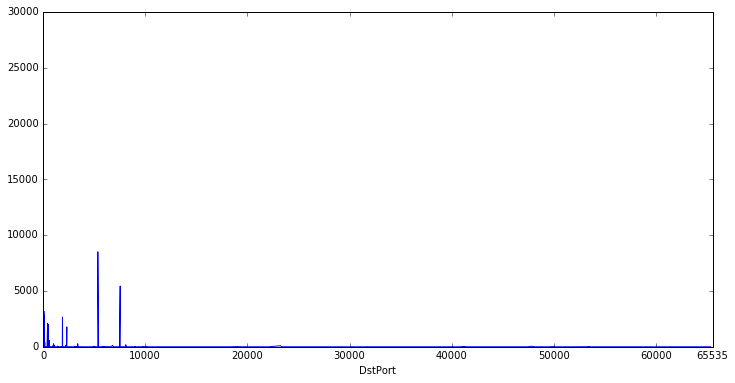

In [216]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import hmac
import hashlib
import ipaddress


%matplotlib inline

df = pd.read_csv('tmp/session_.csv')

df['SrcPort'] = pd.to_numeric(df['SrcPort'])
df['DstPort'] = pd.to_numeric(df['DstPort'])


pl.figure(figsize=(12, 6))
p = df.groupby('DstPort')['DstPort'].count().plot()
p.set_xlim(0,65535)
p.set_xticks([0,10000,20000,30000,40000,50000,60000,65535])

/Users/mhaya/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


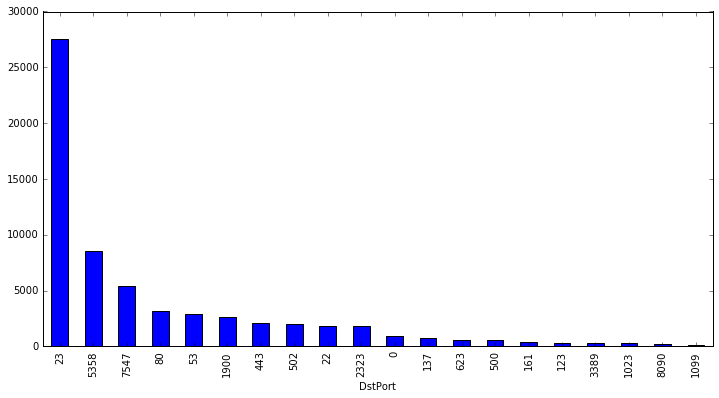

In [207]:
pl.figure(figsize=(12, 6))
df.groupby('DstPort')['DstPort'].count().order(ascending=False)[:20].plot.bar()

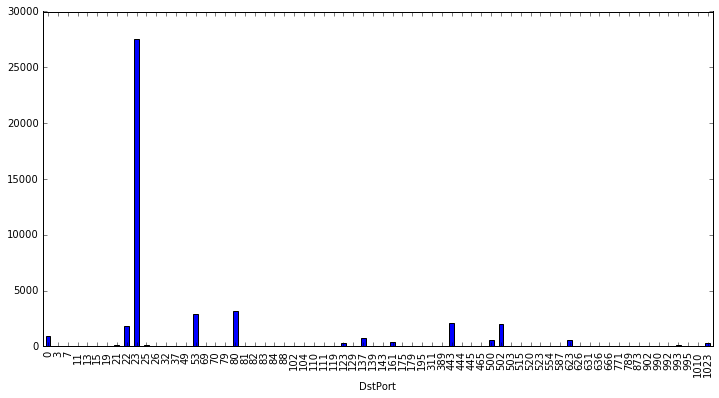

In [217]:
from matplotlib.ticker import *
tmp = df[df.DstPort < 1024]
pl.figure(figsize=(12, 6))
p = tmp.groupby('DstPort')['DstPort'].count().plot.bar()

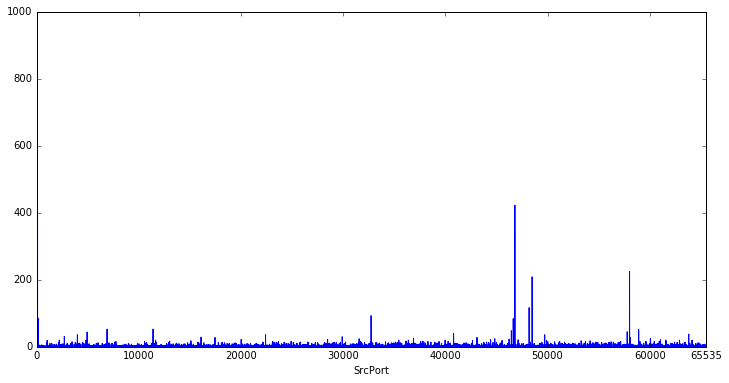

In [218]:
pl.figure(figsize=(12, 6))
p=df.groupby('SrcPort')['SrcPort'].count().plot()
p.set_xlim(0,65535)
p.set_xticks([0,10000,20000,30000,40000,50000,60000,65535])

/Users/mhaya/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


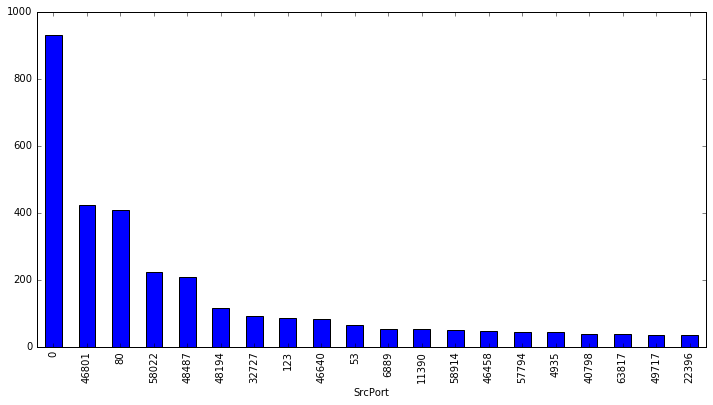

In [203]:
pl.figure(figsize=(12, 6))
df.groupby('SrcPort')['SrcPort'].count().order(ascending=False)[:20].plot.bar()

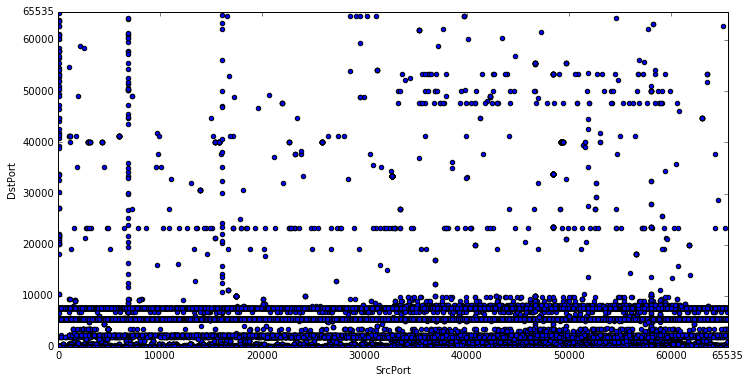

In [219]:

p = df.plot.scatter(x='SrcPort',y='DstPort',figsize=(12, 6))
p.set_xlim(0,65535)
p.set_xticks([0,10000,20000,30000,40000,50000,60000,65535])
p.set_ylim(0,65535)
p.set_yticks([0,10000,20000,30000,40000,50000,60000,65535])


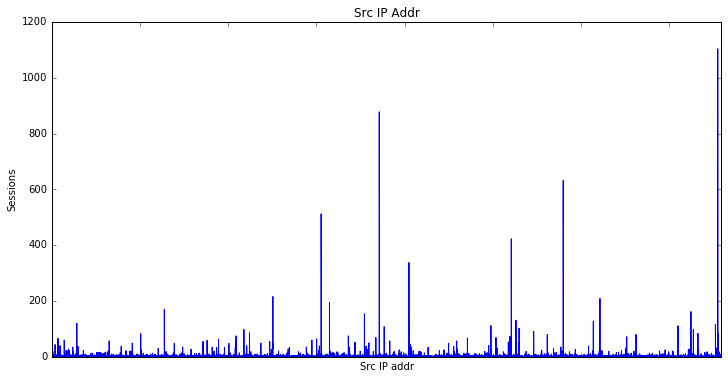

In [172]:
pl.figure(figsize=(12, 6))
plt = df.groupby('SrcIP')['SrcIP'].count().plot()
plt.set_xlabel("Src IP addr")
plt.set_ylabel("Sessions")
# X軸ラベルを消す
plt.tick_params(labelbottom='off')
plt.set_title('Src IP Addr')

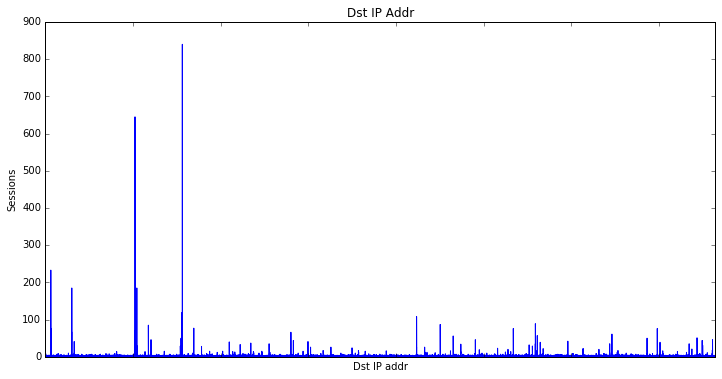

In [220]:
pl.figure(figsize=(12, 6))
p = df.groupby('DstIP')['DstIP'].count().plot()
p.set_xlabel("Dst IP addr")
p.set_ylabel("Sessions")
# X軸ラベルを消す
p.tick_params(labelbottom='off')
p.set_title('Dst IP Addr')

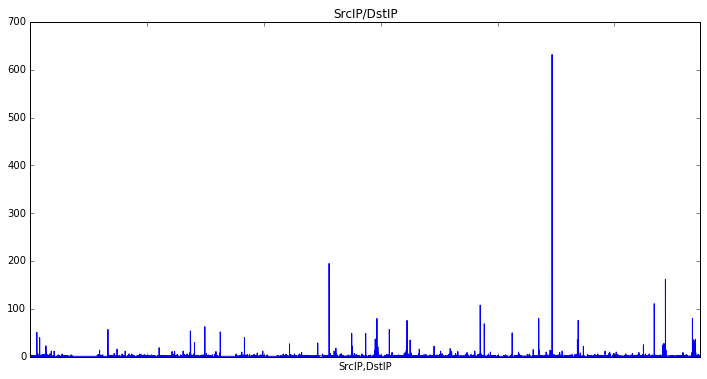

In [221]:
pl.figure(figsize=(12, 6))
p = df.groupby(['SrcIP','DstIP'])['ID'].count().plot()
# X軸ラベルを消す
p.tick_params(labelbottom='off')
p.set_title('SrcIP/DstIP')

/Users/mhaya/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


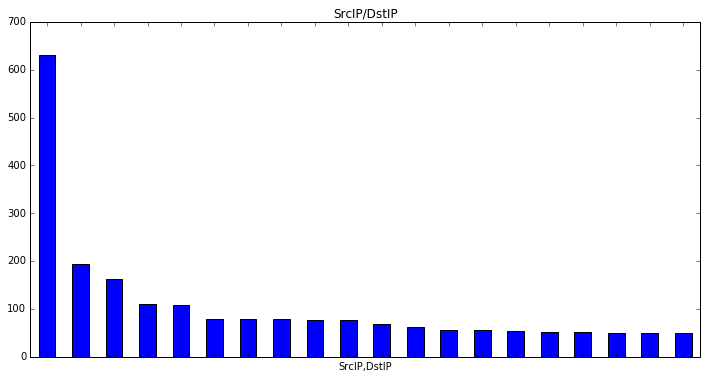

In [202]:
pl.figure(figsize=(12, 6))
plt = df.groupby(['SrcIP','DstIP'])['ID'].count().order(ascending=False)[:20].plot.bar()
# X軸ラベルを消す
plt.tick_params(labelbottom='off')
plt.set_title('SrcIP/DstIP')

In [100]:
df.columns

Index([u'ID', u'Serial', u'SrcIP', u'DstIP', u'SessionID', u'SrcPort',
       u'DstPort', u'Flags', u'Proto'],
      dtype='object')

# ソースIPを限定して

In [103]:
df2 = df[df.SrcIP=='c3223516b3687799e7d89036e5890fc9854019c7d0e076ce3a7efb38e25c13840015']

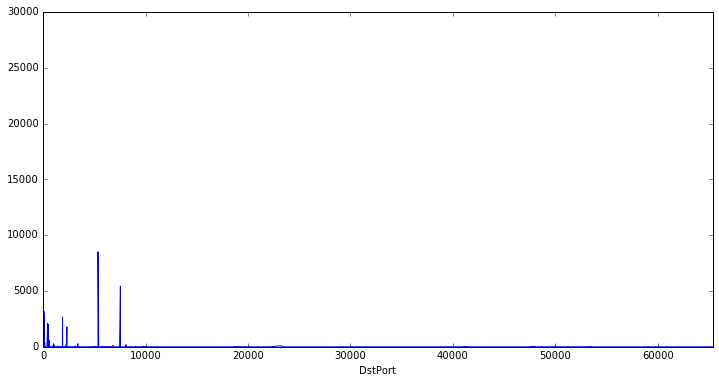

In [160]:
pl.figure(figsize=(12, 6))
df2.groupby('DstPort')['DstPort'].count().plot()

/Users/mhaya/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


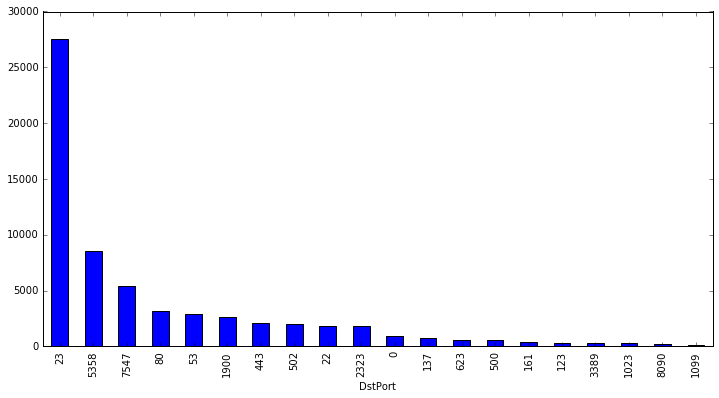

In [201]:
pl.figure(figsize=(12, 6))
df2.groupby('DstPort')['DstPort'].count().order(ascending=False)[:20].plot.bar()

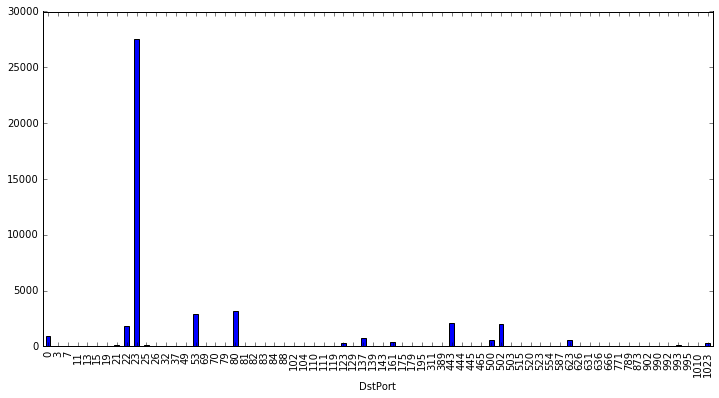

In [222]:
tmp = df2[df.DstPort < 1024]
pl.figure(figsize=(12, 6))
p = tmp.groupby('DstPort')['DstPort'].count().plot.bar()

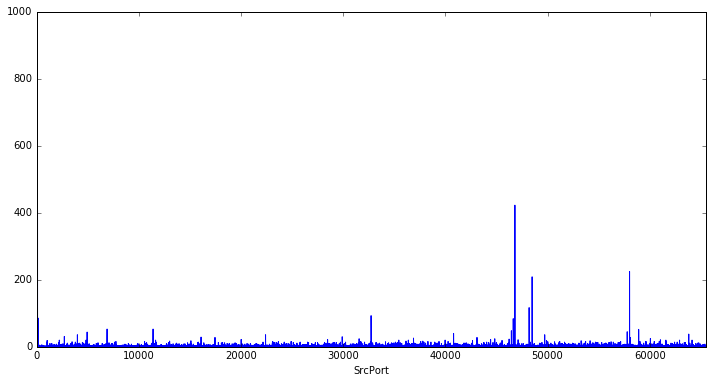

In [161]:
pl.figure(figsize=(12, 6))
df2.groupby('SrcPort')['SrcPort'].count().plot()

/Users/mhaya/.pyenv/versions/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


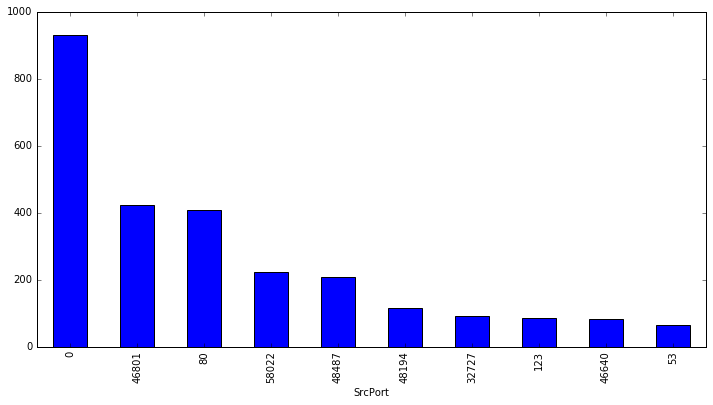

In [223]:
pl.figure(figsize=(12, 6))
p = df2.groupby('SrcPort')['SrcPort'].count().order(ascending=False)[:10].plot.bar()

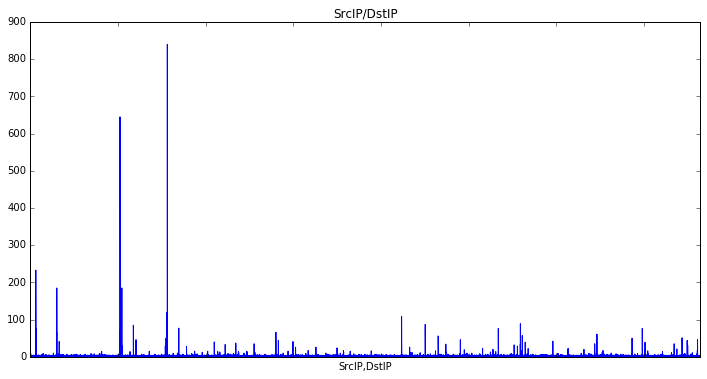

In [262]:
pl.figure(figsize=(12, 6))
p = df2.groupby(['SrcIP','DstIP'])['ID'].count().plot()
# X軸ラベルを消す
p.tick_params(labelbottom='off')
p.set_title('SrcIP/DstIP')

In [212]:
df.dtypes

ID            int64
Serial        int64
SrcIP        object
DstIP        object
SessionID     int64
SrcPort       int64
DstPort       int64
Flags        object
Proto        object
dtype: object

# Port

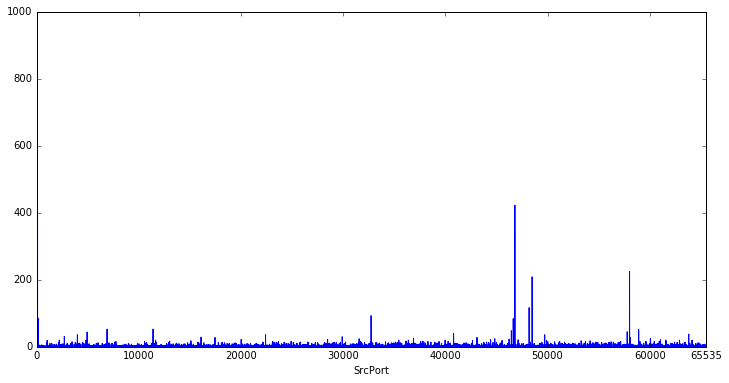

In [248]:
pl.figure(figsize=(12, 6))
p=df.groupby('SrcPort')['SrcPort'].count().plot()
p.set_xlim(0,65535)
p.set_xticks([0,10000,20000,30000,40000,50000,60000,65535])

655区分で分類

In [280]:
tmp=pd.cut(df['SrcPort'],655)

In [281]:
d=tmp.value_counts().sort_index()

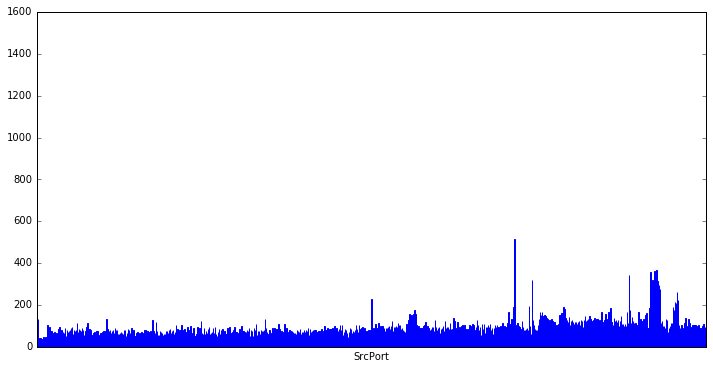

In [282]:
pl.figure(figsize=(12, 6))
p = d.plot.bar(color="#0000FF", edgecolor="#0000FF")
# X軸ラベルを消す,
p.tick_params(labelbottom='off',top='off',bottom='off')
p.set_xlabel('SrcPort')
#plt.bar(range(6550),d,1/1.5,color='blue')

６５５３区分で分割

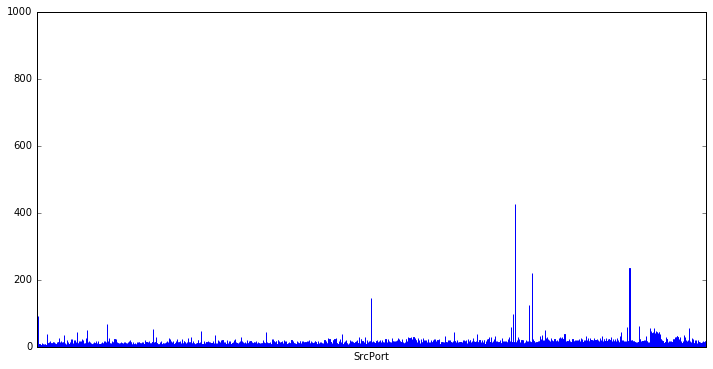

In [283]:
tmp=pd.cut(df['SrcPort'],6553)
d=tmp.value_counts().sort_index()
pl.figure(figsize=(12, 6))
p = d.plot.bar(color="#0000FF", edgecolor="#0000FF")
# X軸ラベルを消す,
p.tick_params(labelbottom='off',top='off',bottom='off')
p.set_xlabel('SrcPort')